In [17]:
using Base.Iterators
using LinearAlgebra
using Plots

### Define problem

In [18]:
energy = 10 # dimensions
H2O = 16
mission = 5
state_dimensions = [energy, H2O, mission]
grid_world3D = zeros(energy, H2O, mission) # 3D grid world in energy, H2O, mission progress

10×16×5 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0

### Generate actions

In [19]:
actions = []
for i in -3:3
    for j in -3:3
        for k in 0:3
            if abs(i) + abs(j) + abs(k) <= 3 # Max action 1-norm distance of 3
                if k == 0 || (k != 0 && (i <= 0 && j <= 0 && i + j < 0) && k == -i - j) # If no mission progress OR mission progress equal to resources expended
                    action = [i, j, k]
                    push!(actions, action)
                end
            end
        end
    end
end
print(actions)

Any[[-3, 0, 0], [-2, -1, 0], [-2, 0, 0], [-2, 1, 0], [-1, -2, 0], [-1, -1, 0], [-1, 0, 0], [-1, 0, 1], [-1, 1, 0], [-1, 2, 0], [0, -3, 0], [0, -2, 0], [0, -1, 0], [0, -1, 1], [0, 0, 0], [0, 1, 0], [0, 2, 0], [0, 3, 0], [1, -2, 0], [1, -1, 0], [1, 0, 0], [1, 1, 0], [1, 2, 0], [2, -1, 0], [2, 0, 0], [2, 1, 0], [3, 0, 0]]

In [20]:
function Reward_Model(state)
    if (state[3] == state_dimensions[3])
        return 1000
    else
        return float(state[1])/10 + float(state[2])/16
    end
end    

#reward model in full matrix form
#reward_model = similar(grid_world3D)
#for i in 1:state_dimensions[1], j in 1:state_dimensions[2], k in 1:state_dimensions[3]
#if (k == state_dimensions[3])
 #   reward_model[i, j, k] = 1000
#else
  #  reward_model[i, j, k] = float(i)/10 + float(j)/16
#end
#end    

Reward_Model (generic function with 1 method)

In [21]:
#transition model
N_SS = state_dimensions[1]*state_dimensions[2]*state_dimensions[3]
function Transition_Model(current_state, action)
    x = rand()
    if (x < 0.05)
        next_state = current_state
        reward = 0.0
    else 
        next_state = current_state + action
        reward = Reward_Model(next_state)
    end
    return next_state, reward
end

Transition_Model (generic function with 1 method)

In [22]:
function find_valid_action(current_state, actions, state_dimension)
    valid_action = false
    current_state_temp = current_state
    while (valid_action == false)
        idx = rand(1:length(actions))
        action = actions[idx]
        if (is_in_grid(current_state, action, state_dimension))
            current_state, reward = Transition_Model(current_state, action)
            valid_action = true
            return action, current_state, reward
        end
    end
end

function is_in_grid(state, action, state_dimension)
    for i in 1:length(state)
        if ((state[i] + action[i]) < 1 || (state[i] + action[i]) > state_dimension[i])
            return false
        end
    end
    return true
end

current_state = [1,1,1]
states = current_state
rewards = [0.0]
for i in 1:200
    action, current_state, reward = find_valid_action(current_state, actions, state_dimensions)
    append!(states, current_state)
    append!(rewards, reward)
    if(current_state[3] == state_dimensions[3])
        break
    end
end
states = reshape(states, (3, Int(length(states)/3)))

3×62 Matrix{Int64}:
 1  1  2  2  5  4  3  2  4  4  3  2  …  6  8  7  7  10  8  9  8  8  8  9  8
 1  2  4  3  3  1  1  2  3  4  2  3     5  6  6  5   5  5  3  3  1  1  2  2
 1  1  1  2  2  2  2  2  2  2  2  2     3  3  4  4   4  4  4  4  4  4  4  5

In [28]:
#prepare to plot

mission = states[3,:]
resources_E = states[1, :]
resources_H2O = states[2,:]
resources_total = resources_E  + resources_H2O
t = range(0, length=length(mission))

rewards_accumulation = cumsum(rewards)


62-element Vector{Float64}:
    0.0
    0.225
    0.675
    1.0625
    1.75
    2.2125
    2.5749999999999997
    2.9
    3.4875
    4.1375
    ⋮
   41.9
   43.2125
   44.324999999999996
   45.412499999999994
   46.39999999999999
   47.26249999999999
   48.124999999999986
   49.149999999999984
 1049.15

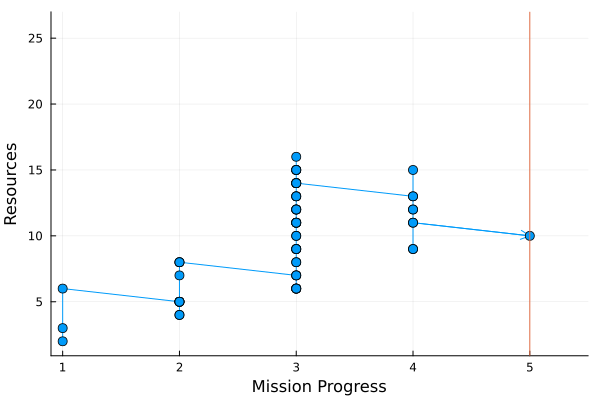

In [24]:
#plot Mission Progress over Resources
p1 = plot()
plot!(p1, mission, resources_total, marker=(:circle,5), arrow=true, arrowsize=0.1, legend=false)
vline!(p1, [5])
ylabel!("Resources")
xlabel!("Mission Progress")
ylims!(0.9, (state_dimensions[1] + state_dimensions[2] + 1))
xlims!(0.9, state_dimensions[3] + 0.5)

#savefig(p1, "Mission Progress VS Resources.pdf")

In [29]:
#plot Mission and Resource development over time
p2 = plot()
plot!(p2 ,t, [resources_E, resources_H2O], label=["Resources Energy" "Resources H2O"], title = "Resource and Mission development over time")
plot!(p2 ,t, mission, label="Mission Progress", linewidth = 2)
hline!(p2 , [5],  linewidth=2, label="Mission Success")
xlabel!("Time Steps")
ylabel!("Mission Progress and Resources")

#savefig(p2, "Mission Progress VS Resources.pdf")

"/Users/Anna/Documents/SanFran/04_Academics/01_Autumn Quarter 2023/AA228/aa-228-final-project/Mission Progress VS Resources.pdf"

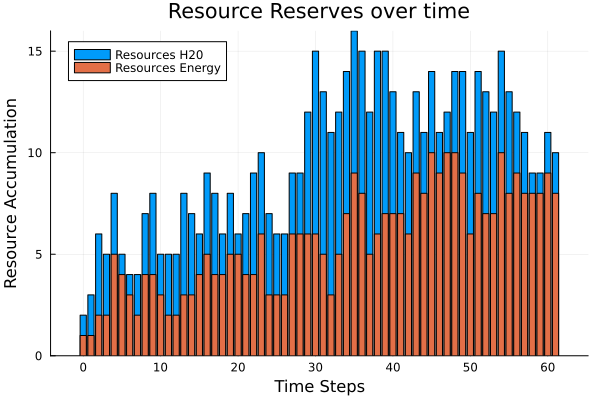

In [26]:
#Resource level histogram
p3 = bar(t, [resources_total, resources_E], xlabel="Time Steps", ylabel="Resource Accumulation", label=["Resources H20" "Resources Energy"], title = "Resource Reserves over time")

#savefig(p3, "Resource Reserves.pdf")

In [30]:
#Plot Reward accumulation over time
layout = @layout [a b] #creates 1x2 subplots

p4 = plot(t[1:end-1], rewards[1:end-1], subplot=1, layout=layout,legend=false)
plot!(p4, t, rewards_accumulation, subplot=2, legend=false)
xlabel!(p4, "Time Steps")
ylabel!(p4, "Rewards", subplot=1)
ylabel!(p4, "Accumulated Rewards", subplot=2)
title!(p4,"Rewards (except the \n last time step)", subplot = 1)
title!(p4,"Accumulated Rewards", subplot = 2)

#savefig(p4, "Rewards.pdf")

"/Users/Anna/Documents/SanFran/04_Academics/01_Autumn Quarter 2023/AA228/aa-228-final-project/Rewards.pdf"